In [1]:
### Pick the file directory
#FILES_DIR = '/media/ab/data/Research_Data/MM10_FullModel_Files/'
FILES_DIR = '/media/ab/data/Research_Data/Matthias/'

Input directory is:  /media/ab/data/Research_Data/Matthias/
Histograms for the statistics of each dataset
- mu is normalized to middle of interval - a negative value indicates mu is upstream of the middle
- square root of lambda is graphed


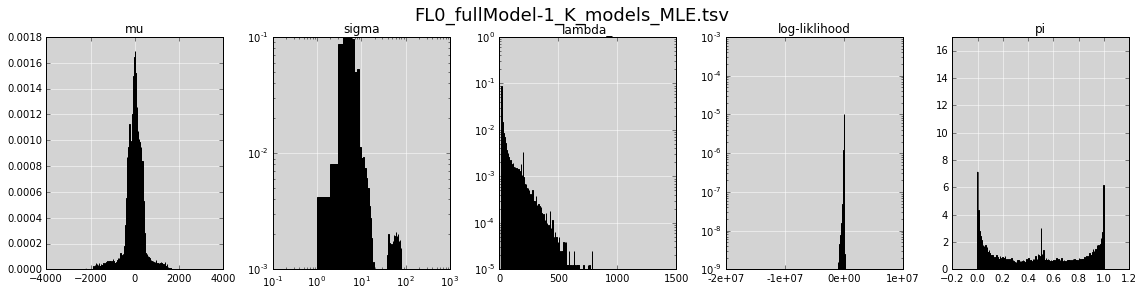

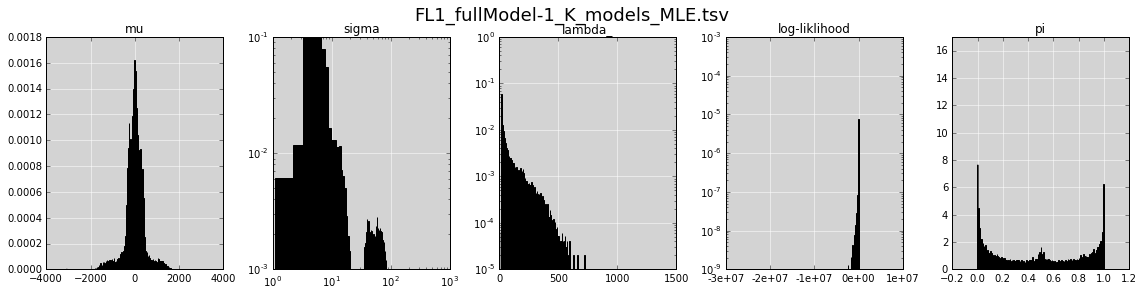

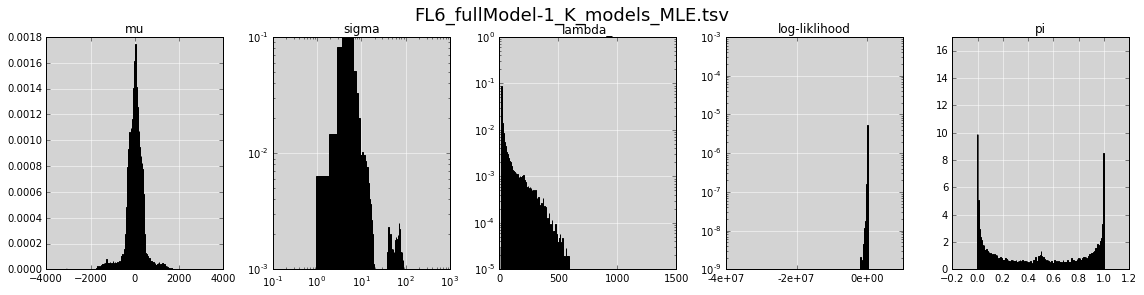

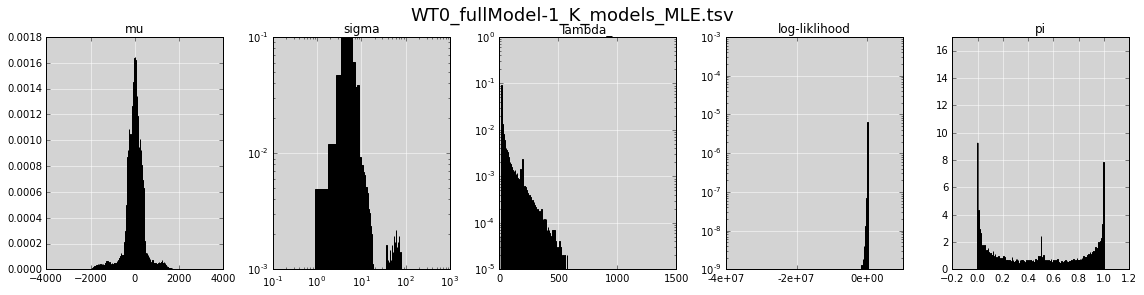

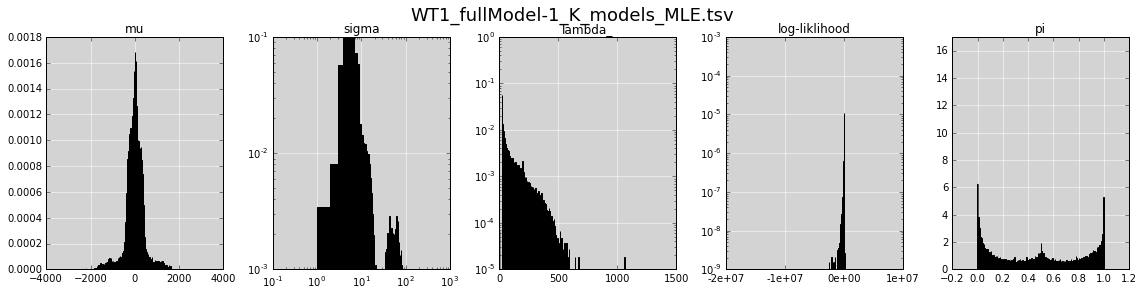

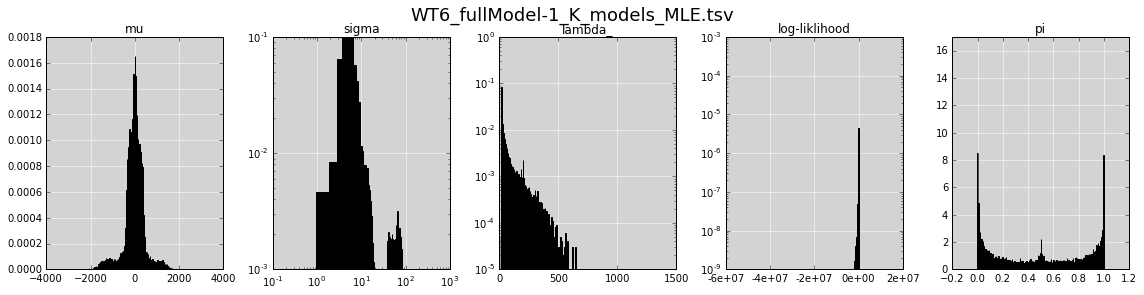

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [2]:
### This code imports the data from each TSV text file made by EMG and creates the graphs for each file. For each 
### dataset, a histogram of the mu, sigma, lambda, log-liklihood, and pi is created. The x and y axis limits are
### are fixed for easy comparison between datasets. Below is a set of matrices that do a pairwise comparison of the 
### distibution of each parameter. It uses the KS pairwise algorithm provided by scipy. The first set of matrices 
### shows the KS statistic for each comparison, while the second set shows the p value of the comparison. 


%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import sys
from scipy import stats
import matplotlib.ticker as mtick


### Initiate lists of variables for later use
all_mu = []
all_sigma = []
all_pi = []
all_lambda_= []
all_data = dict()
def main():  
    directory = FILES_DIR
    print "Input directory is: ", directory
    dir_list = sorted(os.listdir(directory))
    for filename in dir_list:
        if filename[-4:] == '.tsv':      ### Load only the TSV files
            all_data[filename] = load_from_file(directory+filename)
            #print "length of all data: ", len(all_data)
    
    print "Histograms for the statistics of each dataset"
    print "- mu is normalized to middle of interval - a negative value indicates mu is upstream of the middle"
    print "- square root of lambda is graphed"
    
    
    for key  in sorted(all_data.keys()):      
        #print "key: ", key
        mu, sigma, lambda_, log_likelihood, pi = get_data_for_graphs(all_data[key])
        make_graphs(key, mu, sigma, lambda_, log_likelihood, pi)
    
def load_from_file(file_to_open):    

    x=open(file_to_open)   ### Open the file
    data = []                    ### Initiate the data list
    position = ['', '', 0, 0, 0, 0, 0, 0, 0, ]               ### Initate the dict for each genomic interval
    for line in x:               ### For each line in the file x
        if line[0] == '>':       ### Look for indicator of new interval
            position[0] = line.split('|')[0][1:].strip('\n')
            position[1] = (line.split('|')[1]).split(':')[0].strip('\n')
            position[2] = ((line.split('|')[1]).split(':')[1]).split('-')[0].strip('\n')
            position[3] = ((line.split('|')[1]).split(':')[1]).split('-')[1].strip('\n')
            middle = np.mean([    int( position[2] ), int( position[3] ) ])
        if line[0] == '~' and line[1] == '1':   ### Look for indicator of model 1
            position[4] = inf_to_zero((line.split('\t')[0]).split(',')[1].strip('\n'))  # log-likelihood
            position[5] = int(float((line.split('\t')[1].strip('\n'))) - middle)			# mu
            position[6] = np.sqrt(float(inf_to_zero(line.split('\t')[2].strip('\n'))))			# sigma
            position[7] = inf_to_zero(line.split('\t')[3].strip('\n'))			# lambda
            position[8] = inf_to_zero(line.split('\t')[4].strip('\n'))			# pi
            data.append(position)               ### Append the interval dict to the data list                
            position = ['', '', 0, 0, 0, 0, 0, 0, 0, ]                   ### Reset the position
    x.close()
    return data            
        
def get_data_for_graphs(data):              
    lambda_ = []                 ### Init the list of all lambda values
    sigma = []                   ### Init the list of all sigma values
    mu = []                      ### Init the list of all mu values
    log_likelihood = []          ### Init the list of all log_likelihood values
    pi = []                      ### Init the list of all pi values

    for position in data:               ### For each interval, copy the statistics to a separate list
        lambda_.append(float(position[7]))
        sigma.append(float(position[6]))
        mu.append(float(position[5]))
        log_likelihood.append(float(position[4]))
        pi.append(float(position[8]))
        #mu_pi.append((float(position['model_1']['mu_k']), float(position['model_1']['pi_k'])))
    
    return (mu, sigma, lambda_, log_likelihood, pi)
        
        
def make_graphs(filename, x1, x2, x3, x4, x5):
    ### Calculate the number of bins for the histogram
    x1_bins = len(x1) / 100
    x2_bins = len(x2) / 100
    x3_bins = len(x3) / 100
    x4_bins = len(x4) / 100
    x5_bins = len(x5) / 100
    #print x1_bins, x2_bins, x3_bins, x4_bins, x5_bins

    ### Make the five histogram axes for the plot
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

    ### Add the data to the histograms
    ax1.hist(x1, x1_bins, normed=1, histtype='bar', color='black')
    ax1.set_title('mu')
    ax1.locator_params(axis='x',nbins=4)
    ax1.set_xlim(left=-4000, right=4000)
    ax1.set_axis_bgcolor('lightgrey')
    ax1.set_axisbelow(True) 
    ax1.xaxis.grid(True, which="major", linestyle='-', color='white')
    ax1.yaxis.grid(True, which="major", linestyle='-', color='white') 
    #ax1.set_xscale("linear", nonposx='clip')
    ax2.hist(x2, x2_bins, normed=1, histtype='bar', color='black', log=True)
    ax2.set_title('sigma')
    ax2.locator_params(axis='x',nbins=2)
    ax2.set_ylim(bottom=10e-4, top=10e-2)
    #ax2.set_xlim(left=0, right=100)
    ax2.set_xscale("log", nonposx='clip')
    ax2.set_axis_bgcolor('lightgrey')
    ax2.set_axisbelow(True) 
    ax2.xaxis.grid(True, which="major", linestyle='-', color='white')
    ax2.yaxis.grid(True, which="major", linestyle='-', color='white')    
    ax3.hist(x3, x3_bins, normed=1, histtype='bar', color='black', log=True)
    ax3.set_title('lambda_')
    ax3.set_ylim(bottom=10e-6, top=10e-1)
    ax3.locator_params(axis='x',nbins=4)
    ax3.set_xlim(left=0, right=1500)
    ax3.set_axis_bgcolor('lightgrey')
    ax3.set_axisbelow(True) 
    ax3.xaxis.grid(True, which="major", linestyle='-', color='white')
    ax3.yaxis.grid(True, which="major", linestyle='-', color='white')    
    ax4.hist(x4, x4_bins, normed=1, histtype='bar', color='black', log=True)
    ax4.set_title('log-liklihood')
    ax4.locator_params(axis='x',nbins=4)
    ax4.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))
    ax4.set_ylim(bottom=10e-10, top=10e-4)
    ax4.set_axis_bgcolor('lightgrey')
    ax4.set_axisbelow(True) 
    ax4.xaxis.grid(True, which="major", linestyle='-', color='white')
    ax4.yaxis.grid(True, which="major", linestyle='-', color='white')    
    ax5.hist(x5, x5_bins, normed=1, histtype='bar', color='black')
    ax5.set_title('pi')
    ax5.set_ylim(bottom=0, top=17)
    ax5.set_xlim(left=-.2, right=1.2)
    ax5.set_axis_bgcolor('lightgrey')
    ax5.set_axisbelow(True) 
    ax5.xaxis.grid(True, which="major", linestyle='-', color='white')
    ax5.yaxis.grid(True, which="major", linestyle='-', color='white')    ### Add a title to the plot
    fig.suptitle(filename, y=1.02, fontsize=18)

    ### Set the layout and show the plot
    plt.tight_layout()
    plt.show()
    

def inf_to_zero(value):
    if (float(value) == float('inf')) or (-float(value) == float('inf')):
        #print "inf removed", value
        return 0
    else:
        return value

if __name__ == "__main__":
    sys.exit(main())

Graphs are ordered: mu, sigma, lambda, pi
This set of graphs is for the KS statistic


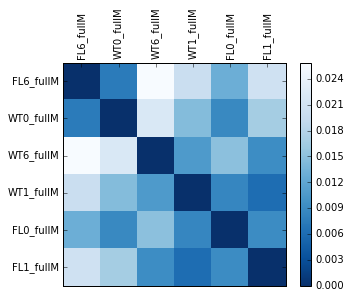

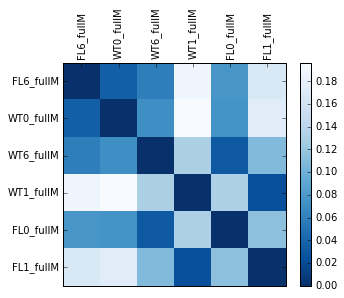

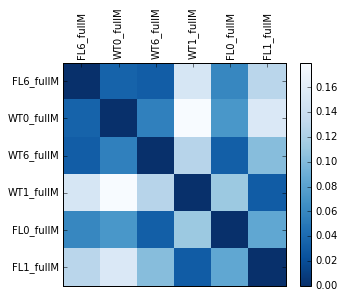

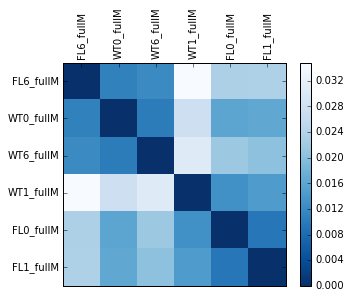

In [5]:
### This calculates the 2sample ks between each pair of files in the dataset, for each parameter, and outputs the 
### plot of the statistic
### New version with clustering

%matplotlib inline
from scipy.spatial import distance
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.cluster.hierarchy import dendrogram, linkage

file_list = []
all_pi = []
all_mu = []
all_lambda = []
all_sigma = []

#print len(all_data)
for key in sorted(all_data.keys()):      
    file_list.append(key)
    pi = []
    mu = []
    lambda_ = []
    sigma = []
    for i in range(len(all_data[key])):
        pi.append(float(all_data[key][i][8]))
        mu.append(float(all_data[key][i][5]))
        lambda_.append(float(all_data[key][i][7]))
        sigma.append(float(all_data[key][i][6]))
    all_pi.append(pi)
    all_mu.append(mu)
    all_lambda.append(lambda_)
    all_sigma.append(sigma)

pi_length = len(all_pi)
ks_results_stat_pi = np.zeros((pi_length, pi_length))
ks_results_stat_mu = np.zeros((pi_length, pi_length))
ks_results_stat_lambda = np.zeros((pi_length, pi_length))
ks_results_stat_sigma = np.zeros((pi_length, pi_length))


k = 0
for i in range(pi_length):
    for j in range(pi_length):
        ks_results_stat_pi[i][j] = scipy.stats.ks_2samp(all_pi[i],all_pi[j])[0]
        ks_results_stat_mu[i][j] = scipy.stats.ks_2samp(all_mu[i],all_mu[j])[0]
        ks_results_stat_lambda[i][j] = scipy.stats.ks_2samp(all_lambda[i],all_lambda[j])[0]
        ks_results_stat_sigma[i][j] = scipy.stats.ks_2samp(all_sigma[i],all_sigma[j])[0]
    k += 1
    #print k

row_labels = file_list

print "Graphs are ordered: mu, sigma, lambda, pi"
print "This set of graphs is for the KS statistic"
#for dataset in [ks_results_stat, ks_results_p, ks_results_stat_log, ks_results_p_log, euclidean_distance]:    
for dataset in [ks_results_stat_mu, ks_results_stat_sigma, ks_results_stat_lambda, ks_results_stat_pi]: 
    fig, ax = plt.subplots(figsize=(5, 4))
    link_out = None
    link_out = linkage(dataset, 'centroid')
    #dend_out = dendrogram(link_out, ax=ax, leaf_rotation=0.,leaf_font_size=14.,orientation='top', distance_sort=False, no_labels=True)
    clustered_matrix = []
    clustered_labels = []
    for i in dend_out['ivl']:
        x_sorted = []
        for j in dend_out['ivl']:
            x_sorted.append(dataset[int(i)][int(j)])
        clustered_matrix.append(x_sorted)
        clustered_labels.append(row_labels[int(i)])
    heatmap = ax.pcolormesh(clustered_matrix, cmap=plt.cm.Blues_r)
    #print row_labels
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    ax.set_yticks(np.arange(len(clustered_labels))+.5)
    ax.set_xticks(np.arange(len(row_labels))+.5)
    ax.set_yticklabels([x[:9] for x in clustered_labels])
    ax.set_xticklabels([x[:9] for x in clustered_labels], rotation='vertical')
    plt.colorbar(heatmap)
    plt.show()

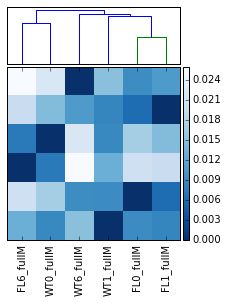

In [17]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

# Generate random features and distance matrix.
x = scipy.rand(40)
D = scipy.zeros([40,40])
for i in range(40):
    for j in range(40):
        D[i,j] = abs(x[i] - x[j])

D = ks_results_stat_mu
# Compute and plot first dendrogram.
fig = pylab.figure(figsize=(4,4))
#ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(D, method='centroid')
#Z1 = sch.dendrogram(Y, orientation='right')
#ax1.set_xticks([])
#ax1.set_yticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(D, method='single')
Z2 = sch.dendrogram(Y)
ax2.set_xticks(np.arange(len(row_labels))+.5)
ax2.set_xticklabels([x[:9] for x in clustered_labels], rotation='vertical')
ax2.tick_params(labeltop='off', labelbottom='on')
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
#idx1 = Z1['leaves']
idx2 = Z2['leaves']
#D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.Blues_r)
#axmatrix.set_xticks([])
axmatrix.set_yticks([])
axmatrix.set_xticks(np.arange(len(row_labels)))
axmatrix.set_xticklabels([x[:9] for x in clustered_labels], rotation='vertical')
axmatrix.tick_params(labeltop='off', labelbottom='on')

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
fig.show()
fig.savefig('dendrogram.png')